<a href="https://colab.research.google.com/github/K-R-sindhu/OBISIP/blob/main/carprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/CarPrice prediction dataset.csv")

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: xlabel='fueltype', ylabel='price'>

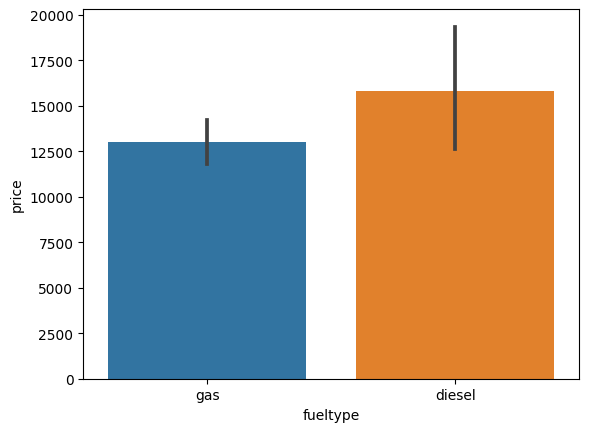

In [ ]:
sns.barplot(x = "fueltype", y= "price", data = data)

<Axes: xlabel='enginetype', ylabel='price'>

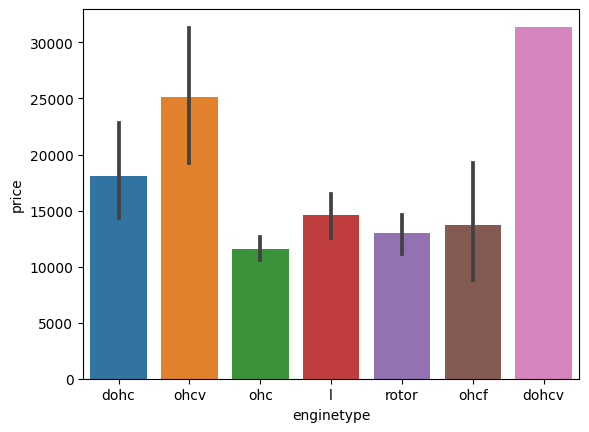

In [ ]:
sns.barplot(x = "enginetype", y= "price", data = data)

<Axes: xlabel='fuelsystem', ylabel='price'>

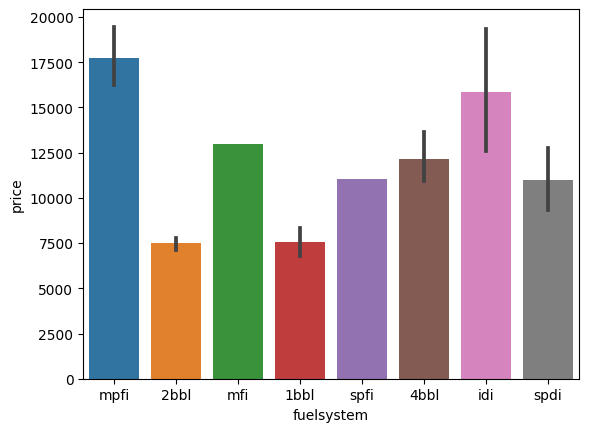

In [ ]:
sns.barplot(x = "fuelsystem", y= "price", data = data)

<Axes: >

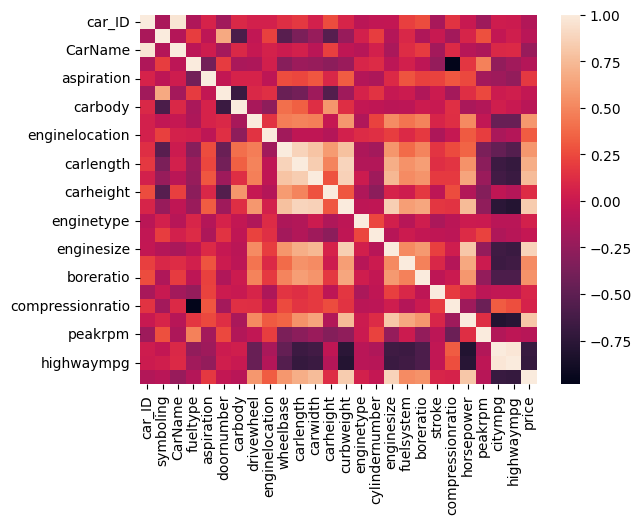

In [ ]:
sns.heatmap(data.corr())

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = LE.fit_transform(data[column])
        print(f"{column} transformed")

CarName transformed
fueltype transformed
aspiration transformed
doornumber transformed
carbody transformed
drivewheel transformed
enginelocation transformed
enginetype transformed
cylindernumber transformed
fuelsystem transformed


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
select_columns=[]
for i in range(len(data.corr()["price"].sort_values())):
    if(data.corr()["price"].sort_values()[i]>0.30):
        select_columns.append(data.corr()["price"].sort_values().index[i])
print(data.corr()["price"].sort_values())
select_columns[:-1]

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.231439
car_ID             -0.109093
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64


['enginelocation',
 'fuelsystem',
 'boreratio',
 'wheelbase',
 'drivewheel',
 'carlength',
 'carwidth',
 'horsepower',
 'curbweight',
 'enginesize']

In [ ]:
target = "price"
dependent = data.drop(target,axis=1)

In [ ]:
X = data[select_columns[:-1]]
Y = data[target]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = .80, random_state = 33)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164, 10), (41, 10), (164,), (41,))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)

print(f"Training Data : {lr.score(x_train, y_train)}")
print(f"Testing Data : {lr.score(x_test, y_test)}")


Training Data : 0.8587927990167865
Testing Data : 0.8621466930212922


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rt = RandomForestRegressor()
rt.fit(x_train, y_train)
ypred = rt.predict(x_test)

print(f"Training Data : {rt.score(x_train, y_train)}")
print(f"Testing Data : {rt.score(x_test, y_test)}")

Training Data : 0.9894835068094676
Testing Data : 0.8668631730051934


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("Mean_absolute_error:",mean_absolute_error(y_test,ypred))
print("Mean_squared_error:",mean_squared_error(y_test,ypred))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,ypred)))
print("r2_score:",r2_score(y_test,ypred))

Mean_absolute_error: 2204.4596962253195
Mean_squared_error: 10550602.324322743
Squre_Mean_absolute_error: 46.951674051361785
r2_score: 0.8668631730051934
